In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("ticks")
font = {'family': 'sans-serif', 'serif': 'Helvetica',
        'size': 25}
plt.rc('font', **font)
legnd = {'fontsize': 20, 'handlelength': 1.5}
plt.rc('legend', **legnd)
mathtext = {'mathtext.default': 'regular' } 
plt.rcParams.update(mathtext)

In [2]:
from matplotlib.patches import Rectangle

class T5P():
    def __init__(self, collection_dir, relative_diff=False):
        self.datafile = collection_dir + "/summary_t5p.tsv"
        self.raw = pd.read_csv(self.datafile, sep="\t")
        
        self.relative_diff = relative_diff
    
    def get_data(self):
        data = self.raw.pivot(index="alpha_ZE", columns="alpha_EZ", values="t5p_first").sort_index(axis=0, ascending=False)
        data.index = np.round(data.index, 3)
        data.columns = np.round(data.columns, 3)
        data = data / 60.0
        
        if self.relative_diff:
            mono = data.loc[0.000, 0.000] #data when there is no interactions -> equivalent to mono-culture
            data = (data-mono)/data
        
        return data
    
    def get_expID_map(self):
        expID_map = self.raw.pivot(index="alpha_ZE", columns="alpha_EZ", values="exp_ID").sort_index(axis=0, ascending=False)
        expID_map.index = np.round(expID_map.index, 3)
        expID_map.columns = np.round(expID_map.columns, 3)
        
        return expID_map
    
    def plot(self, vmin=None, vmax=None):
        data = self.get_data()
        
        if vmin is None:
            vmin = data.min().min()
        if vmax is None:
            vmax = data.max().max()

        fig, ax = plt.subplots(1, 1, figsize=(6, 6))
        ax.set_aspect('equal')

        if self.relative_diff:
            hm = sns.heatmap(data, ax=ax, cmap="RdBu_r", 
                             vmin=vmin, vmax=vmax, center=0.0,
                             cbar=True, cbar_kws={"shrink": .7})
            ax.text(x=7.2, y=0, fontsize=20.0,
                    s="First time to\n5% E$_{equilibrium}$ \n(relative change)")
        else:
            hm = sns.heatmap(data, ax=ax, cmap='viridis_r', 
                             vmin=vmin, vmax=vmax, 
                             cbar=True, cbar_kws={"shrink": .7})
            ax.text(x=7.2, y=0, fontsize=20.0,
                    s="First time to\n5% E$_{equilibrium}$ (h)")

        ax.add_patch(Rectangle((3, 3), 1, 1, fill=False, edgecolor='black', lw=1.0))

        ax.set_xlabel(r"$\alpha_{EZ}$")
        ax.set_ylabel(r"$\alpha_{ZE}$")
        
        return fig, ax

In [3]:
dir_list = ["rational_micEZ70", 
            "rational_micZ20", "rational_micZ50",
            "rational_micZ100", "rational_micZ140"]
mina=[]
maxa=[]
for d in dir_list:
    dat = T5P(d, relative_diff=True).get_data()
    mina.append(dat.min().min())
    maxa.append(dat.max().max())

print(mina)
print(maxa)

[-0.003451623188135484, -0.06369888057024363, -0.04881715281182926, -0.6305057995129044, -0.778308775412388]
[0.011066961449722188, 0.2891143351238435, 0.27381530243668034, 0.2766782857528389, 0.6190507703063046]


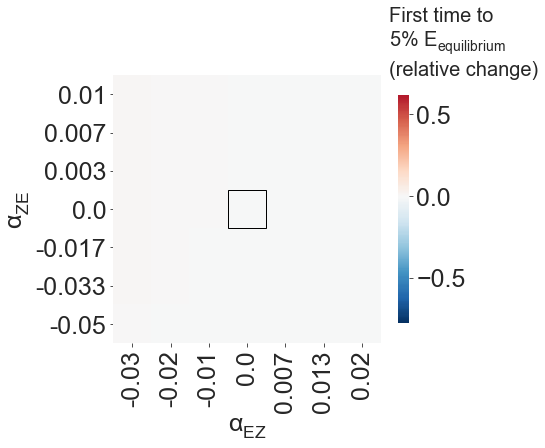

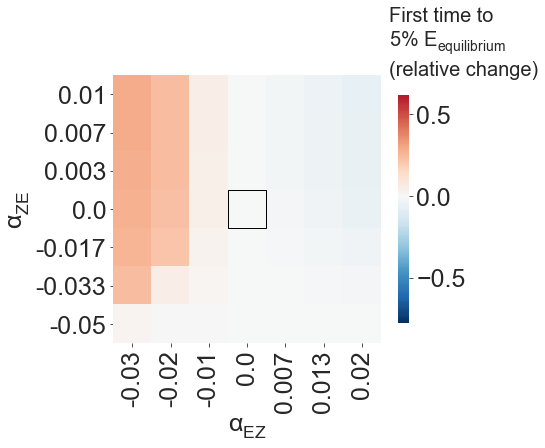

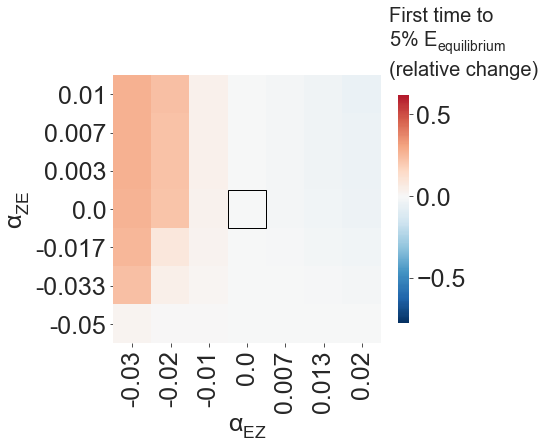

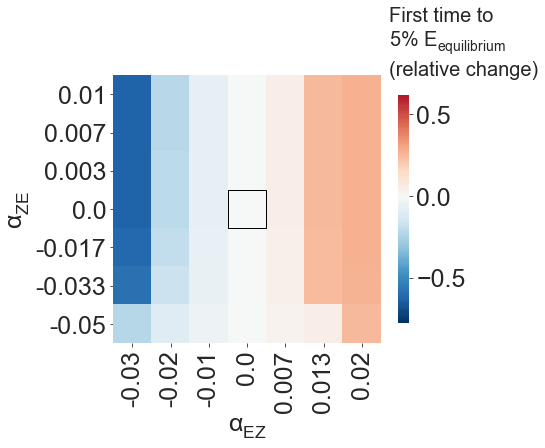

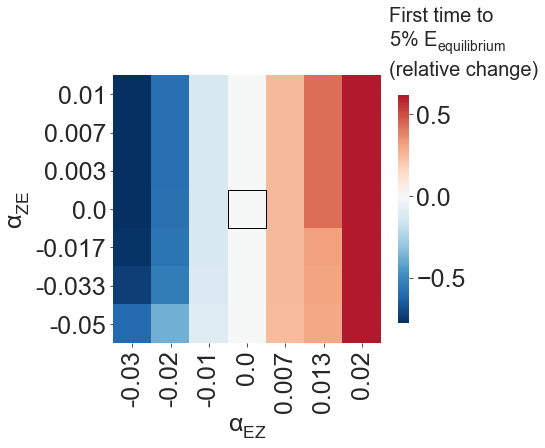

In [4]:
for d in dir_list:
    fig, ax = T5P(d, relative_diff=True).plot(vmin=min(mina), vmax=max(maxa))
    
    savefile = "./t5p/" + d + ".relative.png"
    fig.savefig(savefile, bbox_inches='tight')

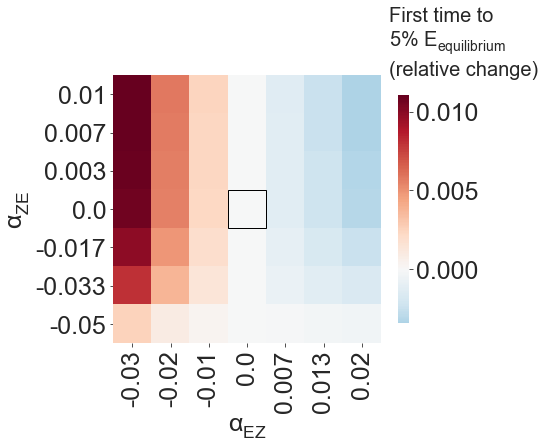

In [5]:
ez70 = T5P(dir_list[0], relative_diff=True)
fig, ax = ez70.plot()

savefile = "./t5p/" + dir_list[0] + ".absolute.png"
fig.savefig(savefile, bbox_inches='tight')

In [6]:
T5P(dir_list[0]).get_expID_map()

alpha_EZ,-0.030,-0.020,-0.010,0.000,0.007,0.013,0.020
alpha_ZE,,,,,,,
0.010,rational_micEZ70.6,rational_micEZ70.13,rational_micEZ70.20,rational_micEZ70.27,rational_micEZ70.34,rational_micEZ70.41,rational_micEZ70.48
0.007,rational_micEZ70.5,rational_micEZ70.12,rational_micEZ70.19,rational_micEZ70.26,rational_micEZ70.33,rational_micEZ70.40,rational_micEZ70.47
0.003,rational_micEZ70.4,rational_micEZ70.11,rational_micEZ70.18,rational_micEZ70.25,rational_micEZ70.32,rational_micEZ70.39,rational_micEZ70.46
0.000,rational_micEZ70.3,rational_micEZ70.10,rational_micEZ70.17,rational_micEZ70.24,rational_micEZ70.31,rational_micEZ70.38,rational_micEZ70.45
-0.017,rational_micEZ70.2,rational_micEZ70.9,rational_micEZ70.16,rational_micEZ70.23,rational_micEZ70.30,rational_micEZ70.37,rational_micEZ70.44
-0.033,rational_micEZ70.1,rational_micEZ70.8,rational_micEZ70.15,rational_micEZ70.22,rational_micEZ70.29,rational_micEZ70.36,rational_micEZ70.43
-0.050,rational_micEZ70.0,rational_micEZ70.7,rational_micEZ70.14,rational_micEZ70.21,rational_micEZ70.28,rational_micEZ70.35,rational_micEZ70.42
